In [4]:
import pandas as pd
df = pd.read_csv("russian_troll_tweets/IRAhandle_tweets_1.csv")
df.drop(['external_author_id','language','publish_date','harvested_date'],axis=1,inplace=True)
df.drop(['tweet_id','article_url','tco1_step1','tco2_step1','tco3_step1'],axis=1,inplace=True)
df.drop(['updates','retweet','new_june_2018','alt_external_id'],axis=1,inplace=True)
df.tail()

,author,content,region,following,followers,post_type,account_type,account_category
243886,AUSTINLOVESBEER,BREAKING: Killer avalanche sweeps three skiers...,United States,41,34,RETWEET,Right,RightTroll
243887,AUSTINLOVESBEER,Why men should support International Women’s D...,United States,41,34,RETWEET,Right,RightTroll
243888,AUSTINLOVESBEER,How we can rebuild trust in a UK divided by in...,United States,41,34,RETWEET,Right,RightTroll
243889,AUSTINLOVESBEER,John Humphrys accused of patronising Angela Ra...,United States,41,34,RETWEET,Right,RightTroll
243890,AUSTINLOVESBEER,Fossilized poop found in 180-million-year-old ...,United States,41,34,RETWEET,Right,RightTroll


In [5]:
import nltk

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243891 entries, 0 to 243890
Data columns (total 8 columns):
author              243891 non-null object
content             243891 non-null object
region              243853 non-null object
following           243891 non-null int64
followers           243891 non-null int64
post_type           154592 non-null object
account_type        243891 non-null object
account_category    243891 non-null object
dtypes: int64(2), object(6)
memory usage: 14.9+ MB


In [71]:
df.account_type.value_counts()

Right         114810
Russian        44964
Left           36072
Hashtager      27349
local          11291
Italian         6278
German          1297
?                608
Arabic           475
Koch             384
Commercial       339
French            22
Spanish            1
Ukranian           1
Name: account_type, dtype: int64

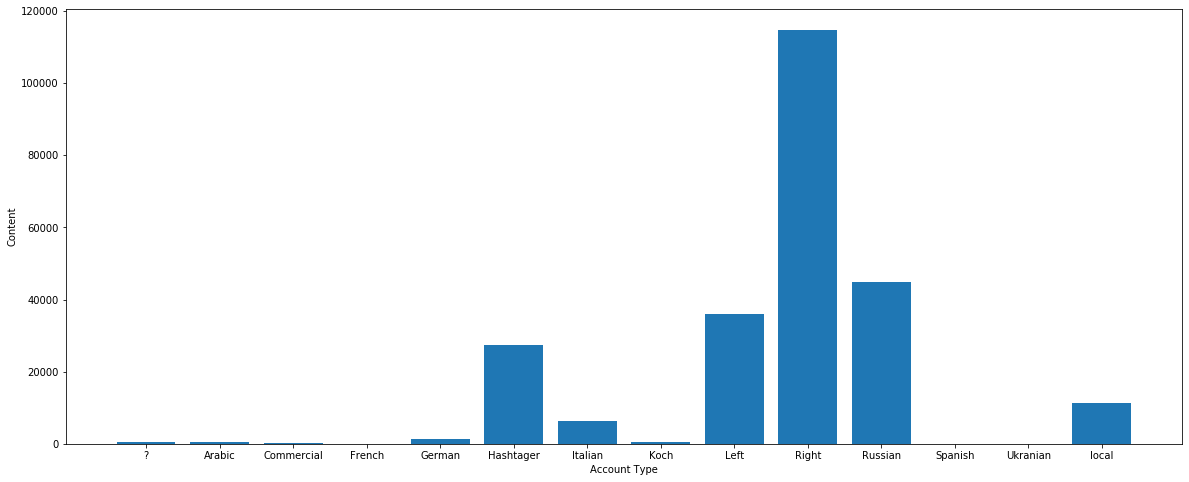

In [12]:
import matplotlib.pyplot as plt
Sentiment_count=df.groupby('account_type').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'])
plt.xlabel('Account Type')
plt.ylabel('Content')
plt.rcParams["figure.figsize"] = (20,18)
plt.show()

In [13]:
text1 = df.loc[0]['content']
print(text1)

"We have a sitting Democrat US Senator on trial for corruption and you've barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC


In [14]:
#nltk.download('punkt')

tokens=nltk.word_tokenize(text1)
print(tokens)

['``', 'We', 'have', 'a', 'sitting', 'Democrat', 'US', 'Senator', 'on', 'trial', 'for', 'corruption', 'and', 'you', "'ve", 'barely', 'heard', 'a', 'peep', 'from', 'the', 'mainstream', 'media', '.', "''", '~', '@', 'nedryun', 'https', ':', '//t.co/gh6g0D1oiC']


POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [15]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/computer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('``', '``'),
 ('We', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('sitting', 'VBG'),
 ('Democrat', 'NNP'),
 ('US', 'NNP'),
 ('Senator', 'NNP'),
 ('on', 'IN'),
 ('trial', 'NN'),
 ('for', 'IN'),
 ('corruption', 'NN'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ("'ve", 'VBP'),
 ('barely', 'RB'),
 ('heard', 'VBN'),
 ('a', 'DT'),
 ('peep', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('mainstream', 'JJ'),
 ('media', 'NNS'),
 ('.', '.'),
 ("''", "''"),
 ('~', 'JJ'),
 ('@', 'NNP'),
 ('nedryun', 'NN'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/gh6g0D1oiC', 'NN')]

In [28]:
df['account_category'].head(10)

0    RightTroll
1    RightTroll
2    RightTroll
3    RightTroll
4    RightTroll
5    RightTroll
6    RightTroll
7    RightTroll
8    RightTroll
9    RightTroll
Name: account_category, dtype: object

In [29]:
df['pre_clean_len'] = [len(t) for t in df.content]

In [30]:
df.head()

,author,content,region,following,followers,post_type,account_type,account_category,pre_clean_len
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,1052,9636,NaN,Right,RightTroll,156
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,1054,9637,NaN,Right,RightTroll,140
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,1054,9637,RETWEET,Right,RightTroll,143
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,1062,9642,NaN,Right,RightTroll,145
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,1050,9645,RETWEET,Right,RightTroll,83


In [31]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.account_type.dtype,
        'description':'account type'
    },
    'text':{
        'type':df.content.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (243891, 9),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'account type', 'type': dtype('O')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


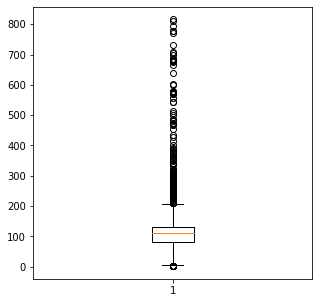

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()


In [38]:
df[df.pre_clean_len > 700].head(20)

,author,content,region,following,followers,post_type,account_type,account_category,pre_clean_len
65112,ALECMOOOOODY,'@LovesTheFab4 @bdsjacquot @PalestineFamily @B...,United States,514,896,RETWEET,Left,LeftTroll,707
65133,ALECMOOOOODY,'@achmatpandy @ShofarProject @sdeitch @LovesTh...,United States,514,898,RETWEET,Left,LeftTroll,705
66149,ALECMOOOOODY,'@GefilteFishy @beecee1122 @Louamerica @Shingo...,United States,506,867,RETWEET,Left,LeftTroll,778
110159,AMELIEBALDWIN,.@Speedcomesfirst @YouTube @GigaLiving @MissLi...,United States,2330,2734,RETWEET,Right,RightTroll,793
117337,AMELIEBALDWIN,'@GlennMcmillan14 @educatormarcia @wrow51 @Puf...,United States,2296,2792,RETWEET,Right,RightTroll,776
118718,AMELIEBALDWIN,'@bdsjacquot @Springbaby777 @yadid_y @RokedvMa...,United States,2287,2829,RETWEET,Right,RightTroll,816
118801,AMELIEBALDWIN,'@RokedvMagen @AngryScreed @7251214 @coinabs @...,United States,2287,2825,RETWEET,Right,RightTroll,809
121450,AMELIEBALDWIN,'@sthroman4491 @MaryglennMary @TurbulentOlivia...,United States,2284,2855,NaN,Right,RightTroll,731
192223,ANTONHAYHAY,'@Im_TheAntiTrump @MamaKeiki @funder @Khanoiss...,United States,299,705,RETWEET,Left,LeftTroll,772


In [55]:
demo1 = df.content[65112]
print(demo1)

'@LovesTheFab4 @bdsjacquot @PalestineFamily @BaruchHashem365 @amjadrasmy @omgstater @ralvarezdj @ghalianno @Alison_mayhem37 @FR33_W0RLD @RKazbaar @Raz581 @Springbaby777 @_moobs_ @coinabs @RokedvMagen @lisabarrett23 @Andysolomono @mohamedAbouswel @SpinMeister_UK @harmlesstree2 @Free4Hungry @LollllllaJR @MLKstudios @iamsideeque @ANINDAUK @joe_n1nety @TanyaKasim @AnwarPrinceP @MrNegroMilitant @AlCaselli @khussh_ @gallinini1 @loveangel412 @Ramdog1980 @teddy_cat1 @rk70534 @Laizesfaire @purplhaze42 @AngelWarrior512 @ChuckWagonMault @levy_haaretz @JewishChron @IndyVoices @POTUS @GMA @MailOnline  @NYTimes @BBCworld : @Israel Dropped 100 TONS of BOMBS in 9 hrs on #Gaza = How SICK !  https://t.co/6la23a2LUz'


In [54]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(demo1, "html.parser")
print(example1.get_text())

'@LovesTheFab4 @bdsjacquot @PalestineFamily @BaruchHashem365 @amjadrasmy @omgstater @ralvarezdj @ghalianno @Alison_mayhem37 @FR33_W0RLD @RKazbaar @Raz581 @Springbaby777 @_moobs_ @coinabs @RokedvMagen @lisabarrett23 @Andysolomono @mohamedAbouswel @SpinMeister_UK @harmlesstree2 @Free4Hungry @LollllllaJR @MLKstudios @iamsideeque @ANINDAUK @joe_n1nety @TanyaKasim @AnwarPrinceP @MrNegroMilitant @AlCaselli @khussh_ @gallinini1 @loveangel412 @Ramdog1980 @teddy_cat1 @rk70534 @Laizesfaire @purplhaze42 @AngelWarrior512 @ChuckWagonMault @levy_haaretz @JewishChron @IndyVoices @POTUS @GMA @MailOnline  @NYTimes @BBCworld : @Israel Dropped 100 TONS of BOMBS in 9 hrs on #Gaza = How SICK !  https://t.co/6la23a2LUz'


In [60]:
import re
demo2 = re.sub(r'@[A-Za-z0-9]+','',demo1)
print(demo2)

'        _mayhem37 _W0RLD    @_moobs_      _UK       _n1nety     _    _cat1      _haaretz         :  Dropped 100 TONS of BOMBS in 9 hrs on #Gaza = How SICK !  https://t.co/6la23a2LUz'


In [59]:
re.sub('https?://[A-Za-z0-9./]+','',demo2)

"'        _mayhem37 _W0RLD    @_moobs_      _UK       _n1nety     _    _cat1      _haaretz         :  Dropped 100 TONS of BOMBS in 9 hrs on #Gaza = How SICK !  '"

#### Data Cleaning Function

In [61]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'html.parser')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.content[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['we have a sitting democrat us senator on trial for corruption and you ve barely heard a peep from the mainstream media',
 'marshawn lynch arrives to game in anti trump shirt judging by his sagging pants the shirt should say lynch vs belt',
 'daughter of fallen navy sailor delivers powerful monologue on anthem protests burns her nfl packers gear boycottnfl',
 'just in president trump dedicates presidents cup golf tournament trophy to the people of florida texas and puerto rico',
 'respecting our national anthem standforouranthem',
 'dan bongino nobody trolls liberals better than donald trump exactly',
 '',
 'doesn t matter that cnn doesn t report on your crimes this won t change the fact that you re going down',
 'as much as i hate promoting cnn article here they are admitting everything trump said about pr relief two days ago',
 'after the genocide remark from san juan mayor the narrative has changed though fixes it s reporting constantly',
 'after the genocide remark from san juan m

In [67]:
nums = [0,240000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                  
    clean_tweet_texts.append(tweet_cleaner(df['content'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 240000 has been processed
Tweets 20000 of 240000 has been processed
Tweets 30000 of 240000 has been processed
Tweets 40000 of 240000 has been processed
Tweets 50000 of 240000 has been processed
Tweets 60000 of 240000 has been processed
Tweets 70000 of 240000 has been processed
Tweets 80000 of 240000 has been processed
Tweets 90000 of 240000 has been processed
Tweets 100000 of 240000 has been processed
Tweets 110000 of 240000 has been processed
Tweets 120000 of 240000 has been processed
Tweets 130000 of 240000 has been processed
Tweets 140000 of 240000 has been processed
Tweets 150000 of 240000 has been processed
Tweets 160000 of 240000 has been processed
Tweets 170000 of 240000 has been processed
Tweets 180000 of 240000 has been processed
Tweets 190000 of 240000 has been processed
Tweets 200000 of 240000 has been processed
Tweets 210000 of 240000 has been processed
Tweets 220000 of 240000 has been processed
Tweets 230000 of 240000 has

In [68]:
print(clean_tweet_texts[1])

marshawn lynch arrives to game in anti trump shirt judging by his sagging pants the shirt should say lynch vs belt


In [70]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['account_type'] = df.account_type
clean_df.head()

,text,account_type
0,we have a sitting democrat us senator on trial...,Right
1,marshawn lynch arrives to game in anti trump s...,Right
2,daughter of fallen navy sailor delivers powerf...,Right
3,just in president trump dedicates presidents c...,Right
4,respecting our national anthem standforouranthem,Right


In [72]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,account_type
0,we have a sitting democrat us senator on trial...,Right
1,marshawn lynch arrives to game in anti trump s...,Right
2,daughter of fallen navy sailor delivers powerf...,Right
3,just in president trump dedicates presidents c...,Right
4,respecting our national anthem standforouranthem,Right
